In [ ]:
## Notebook env: mirtud_env (R kernel)
## This notebook quantifies the correlation between miR exp level in MDAMB231 and 
## the observed global txn effect upon knockdown of those miRs in mir_tud expt in MDAMB231

## We expect high expressing miRs to see a larger txn effect upon knockdown

In [1]:
library(stringr)
library(dplyr)
library(ggplot2)
library(dplyr)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
load('/home/ssobti/projects/mir_tud/output_data/genexp_pathway/hallmark_genesetexp_x_guide_mtxs.RData')

In [3]:
## only keep guides that were also present in edist calculations (guides < 50 cells thrown out)
mir_tud_edist_one_control = read.csv('/home/ssobti/projects/mir_tud/output_data/edist/updated_inputs/miR_etest_df_combined_controls_without_miR_families.csv')
colnames(mir_tud_edist_one_control)[1] = 'miR'
genesetexp_x_guide_FC = genesetexp_x_guide_FC[, mir_tud_edist_one_control$miR]

In [4]:
## given that we are measuring txn change by fold change in hallmark gene set exp instead of indiv gene fold change,
## we don't have to get rid of low expressing rows that might cause higher noise in fold change data
genesetexp_x_guide_FC

,TuD_NC,hsa-let-7a-2-3p,hsa-let-7b-3p,hsa-let-7f-2-3p,hsa-let-7i-3p,hsa-miR-100-3p,hsa-miR-101-3p,hsa-miR-10399-3p,hsa-miR-10399-5p,hsa-miR-103a-2-5p,⋯,hsa-miR-937-3p,hsa-miR-940,hsa-miR-941,hsa-miR-942-3p,hsa-miR-942-5p,hsa-miR-96-5p,hsa-miR-98-3p,hsa-miR-9903,hsa-miR-99b-3p,hsa-miR-99b-5p
HALLMARK_ADIPOGENESIS,1,0.9906466,0.9974106,1.0160233,1.0146605,1.0154172,0.9964875,0.9970033,0.9825685,1.0003509,⋯,0.9881087,1.0020208,1.0108807,1.0102648,0.9755283,0.9978013,1.0075351,0.9911738,0.9955099,0.9962282
HALLMARK_ALLOGRAFT_REJECTION,1,1.0012804,0.9970834,0.9989913,1.0180949,0.9898252,1.0112179,1.0034524,0.9992525,0.9946452,⋯,0.9867536,1.0085350,1.0128267,1.0234828,0.9711618,1.0032748,0.9955568,0.9880447,0.9966803,1.0260007
HALLMARK_ANDROGEN_RESPONSE,1,0.9939497,0.9987107,1.0128666,1.0293631,1.0031020,1.0068603,1.0003328,0.9907183,1.0218829,⋯,1.0079303,0.9824891,0.9882568,1.0037855,0.9922649,1.0067062,1.0189652,0.9947242,0.9960878,0.9896233
HALLMARK_ANGIOGENESIS,1,0.9948750,1.0755640,0.9618598,0.9936042,0.9671334,0.9691749,1.0571607,1.0237108,1.0848656,⋯,0.9860084,1.0292525,1.0663312,0.9869339,0.9609710,0.9037162,1.0790402,0.9960475,0.9615310,1.0088855
HALLMARK_APICAL_JUNCTION,1,1.0061751,0.9795661,1.0356738,1.0070082,0.9907320,1.0009482,0.9769224,0.9764652,0.9910732,⋯,1.0208693,0.9923686,0.9920065,1.0019439,1.0092783,1.0328440,1.0059270,0.9953102,1.0394290,0.9728535
HALLMARK_APICAL_SURFACE,1,0.9546657,1.0194141,0.9509249,0.9810355,0.9663273,0.9406720,0.9807869,1.0014247,0.9806522,⋯,1.0371541,0.9971215,0.9609056,0.9246097,1.0190454,1.0265603,1.0500816,1.0466159,0.9859791,0.9389754
HALLMARK_APOPTOSIS,1,0.9991310,1.0150069,1.0327850,1.0167877,1.0038842,1.0176121,1.0044452,0.9866381,1.0135453,⋯,1.0037325,0.9954994,0.9966265,1.0045105,1.0177982,1.0045442,0.9913696,0.9777382,0.9824798,0.9900743
HALLMARK_BILE_ACID_METABOLISM,1,0.9714325,1.0249662,1.0015137,0.9792882,0.9981809,0.9776501,0.9958905,1.0103247,1.0253310,⋯,0.9932305,0.9630085,1.0022322,0.9925510,1.0077355,1.0119479,1.0409434,0.9942545,0.9956740,0.9625743
HALLMARK_CHOLESTEROL_HOMEOSTASIS,1,1.0076466,0.9999329,1.0082544,1.0201749,0.9959968,1.0075962,0.9830834,1.0066727,0.9972809,⋯,1.0277487,1.0067880,1.0187143,0.9970488,0.9733931,0.9845898,1.0076267,0.9808914,0.9910148,1.0008969
HALLMARK_COAGULATION,1,0.9760056,1.0396034,1.0157061,1.0377436,1.0022102,0.9984883,1.0133751,0.9896156,1.0085930,⋯,0.9990980,0.9924941,1.0092899,1.0202979,0.9762522,1.0078549,1.0120896,0.9883059,0.9776398,0.9875708


In [5]:
## quantify absolute value fold change in each column (guide) and sum them for the column

genesetexp_x_guide_FC_difference = apply(X = genesetexp_x_guide_FC, MARGIN = 2, FUN = function(x){abs(x-1)})
genesetexp_x_guide_FC_difference_summed = apply(X = genesetexp_x_guide_FC_difference, MARGIN = 2, FUN = sum)
genesetexp_x_guide_FC_difference_summed_df = data.frame(miR = names(genesetexp_x_guide_FC_difference_summed), FC_diff_summed = genesetexp_x_guide_FC_difference_summed)

In [6]:
## Loading miR expression levels (from lab's MDAMB231 miR expression sequencing)
MDAMB231_1_miRexp = read.csv('/home/ssobti/projects/mir_tud/MDAMB231_smRNA_seq/MDA231_1.cnt', sep = '\t', header = FALSE)
MDAMB231_2_miRexp = read.csv('/home/ssobti/projects/mir_tud/MDAMB231_smRNA_seq/MDA231_2.cnt', sep = '\t', header = FALSE)

In [7]:
colnames(MDAMB231_1_miRexp) = c('miR', 'count')
colnames(MDAMB231_2_miRexp) = c('miR', 'count')

In [8]:
MDAMB231_1_miRexp_filtered = MDAMB231_1_miRexp[startsWith(MDAMB231_1_miRexp$miR, 'hsa-'),]
MDAMB231_2_miRexp_filtered = MDAMB231_2_miRexp[startsWith(MDAMB231_2_miRexp$miR, 'hsa-'),]

In [9]:
MDAMB231_1_miRexp_filtered$miR = MDAMB231_1_miRexp_filtered$miR %>% str_remove('hsa-')
MDAMB231_2_miRexp_filtered$miR = MDAMB231_2_miRexp_filtered$miR %>% str_remove('hsa-')

In [10]:
genesetexp_x_guide_FC_difference_summed_df$miR = genesetexp_x_guide_FC_difference_summed_df$miR %>% str_remove('-5p') %>% str_remove('-3p') %>% str_remove('hsa-') %>% str_replace(pattern = 'miR', replacement = 'mir')

In [11]:
### average the -5p and -3p mir's that are now shown as duplicates
duplicated_FC_diffs_summed = genesetexp_x_guide_FC_difference_summed_df[(duplicated(genesetexp_x_guide_FC_difference_summed_df$miR) | duplicated(genesetexp_x_guide_FC_difference_summed_df$miR, fromLast = TRUE)),]$FC_diff_summed
duplicated_FC_diffs_summed = colMeans(matrix(duplicated_FC_diffs_summed,2))

In [12]:
duplicated_FC_diffs_summed %>% length()

[1] 64

In [13]:
duplicates = genesetexp_x_guide_FC_difference_summed_df[(duplicated(genesetexp_x_guide_FC_difference_summed_df$miR) | duplicated(genesetexp_x_guide_FC_difference_summed_df$miR, fromLast = TRUE)),]
duplicates = duplicates[duplicated(duplicates$miR),]

In [14]:
non_duplicates = genesetexp_x_guide_FC_difference_summed_df[!(duplicated(genesetexp_x_guide_FC_difference_summed_df$miR) | duplicated(genesetexp_x_guide_FC_difference_summed_df$miR, fromLast = TRUE)),]

In [15]:
nrow(non_duplicates)
nrow(duplicates)

[1] 196

[1] 64

In [16]:
genesetexp_x_guide_FC_difference_summed_df_final = rbind(non_duplicates, duplicates)

In [17]:
rownames(genesetexp_x_guide_FC_difference_summed_df_final) = genesetexp_x_guide_FC_difference_summed_df_final$miR

In [18]:
length(intersect(genesetexp_x_guide_FC_difference_summed_df_final$miR, MDAMB231_1_miRexp_filtered$miR))

[1] 192

In [19]:
rownames(MDAMB231_1_miRexp_filtered) = MDAMB231_1_miRexp_filtered$miR
rownames(MDAMB231_2_miRexp_filtered) = MDAMB231_2_miRexp_filtered$miR


In [20]:
intersecting_miRs_FC_MDAMB231_1 = intersect(rownames(genesetexp_x_guide_FC_difference_summed_df_final), rownames(MDAMB231_1_miRexp_filtered))


In [21]:
plot_df = data.frame(miRs = intersecting_miRs_FC_MDAMB231_1, 
                     expression = MDAMB231_1_miRexp_filtered[intersecting_miRs_FC_MDAMB231_1, 'count'], 
                     FC_diff_summed = genesetexp_x_guide_FC_difference_summed_df_final[intersecting_miRs_FC_MDAMB231_1,'FC_diff_summed'])

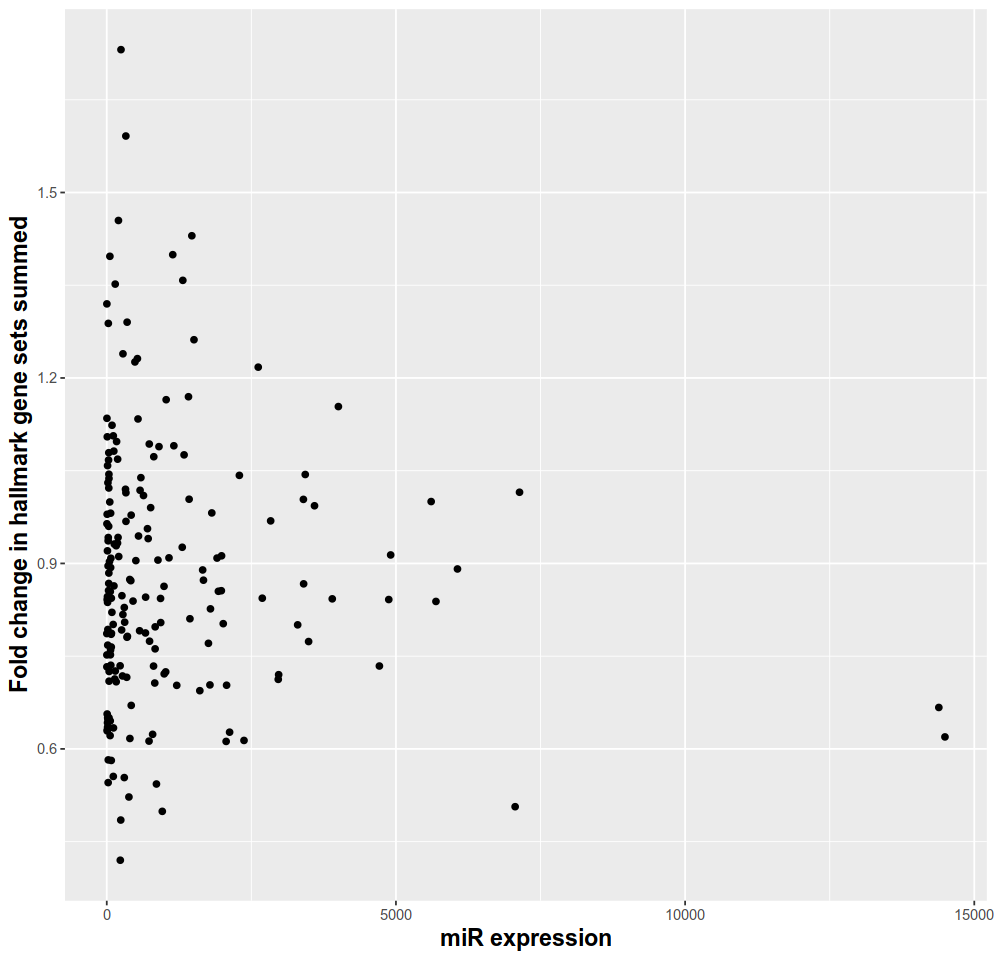

In [22]:
options(repr.plot.width=8.3, repr.plot.height=8)
ggplot(plot_df, aes(expression, FC_diff_summed)) + geom_point() + xlab('miR expression') + ylab('Fold change in hallmark gene sets summed') + theme(axis.title=element_text(size=14,face="bold"))

In [23]:
## normalize the distances and expression from 0 to 1
plot_df$expression = plot_df$expression/max(plot_df$expression)

normalization_vec = plot_df$FC_diff_summed
normalization_vec2 = normalization_vec + abs(min(normalization_vec))
normalization_vec2 = normalization_vec2/max(normalization_vec2)
plot_df$FC_diff_summed = normalization_vec2

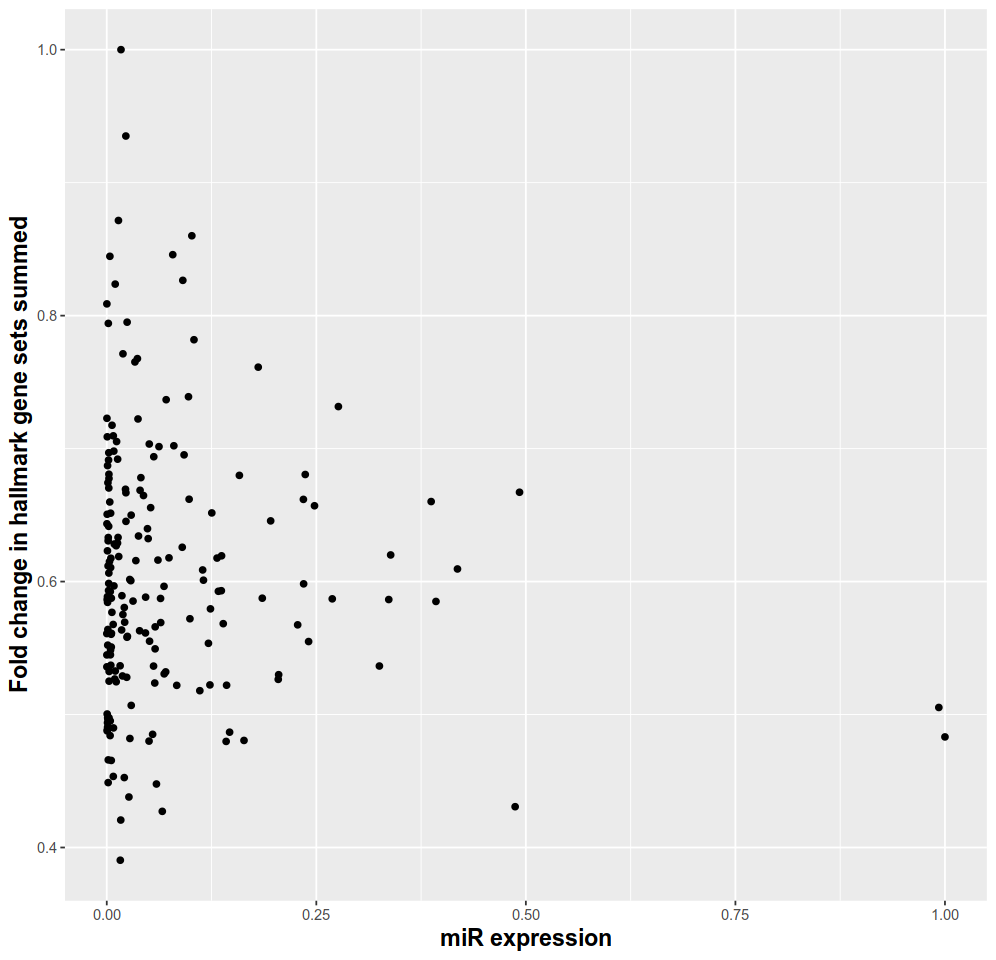

In [25]:
ggplot(plot_df, aes(expression, FC_diff_summed)) + geom_point() + xlab('miR expression')+ ylab('Fold change in hallmark gene sets summed') + theme(axis.title=element_text(size=14,face="bold"))